In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib notebook

In [2]:
fits_dir = "/data/tnorecon/RECON_clean/yakima/"
fits_data = fits.getdata(fits_dir + "20201021/20201021_2/00282.fits")
fits_dark = fits.getdata(fits_dir + "20201021/20201021_4.dark")
fits_flat = fits.getdata(fits_dir + "20201021/20201021_3.flat")

normalized = fits_flat/(np.median(fits_flat))
dark_subtracted = np.subtract(fits_data, fits_dark)
flat_subtracted = np.true_divide(dark_subtracted, normalized)

fits.getheader(fits_dir + "20201021/20201021_2/00282.fits")

/home/jhub/.conda/envs/hubenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/jhub/.conda/envs/hubenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


SIMPLE  =                    T / Written by IDL:  Tue Jan  5 11:37:39 2021      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  640 /                                                
NAXIS2  =                  480 /                                                
DATE    = '2021-01-05'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
EXPTIME =              2.13547 /Exposure time in seconds                        
DATE-OBS= '2020-10-21T11:33:56.660' /Start of exposure UTC                      

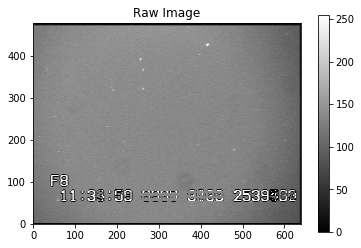

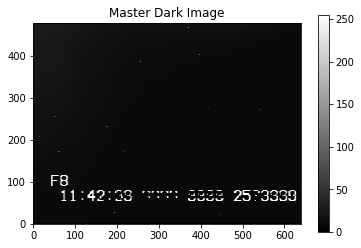

In [3]:
plt.figure()
plt.title("Raw Image")
plt.imshow(fits_data, cmap='gray', origin='top', vmin=0, vmax=255)
plt.colorbar()

plt.figure()
plt.title("Master Dark Image")
plt.imshow(fits_dark, cmap='gray', origin='top', vmin=0, vmax=255)
plt.colorbar()

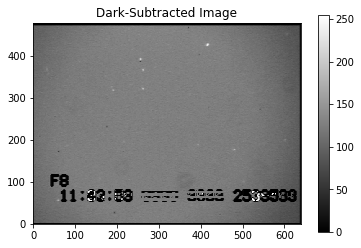

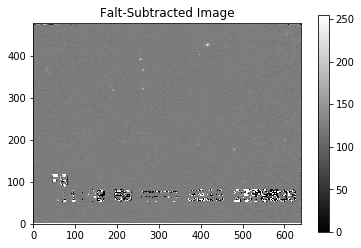

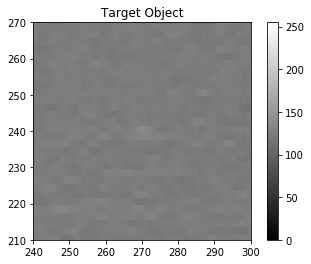

In [4]:
plt.figure()
plt.title("Dark-Subtracted Image")
plt.imshow(dark_subtracted, cmap='gray', origin='top', vmin=0, vmax=255)
plt.colorbar()

plt.figure()
plt.title("Falt-Subtracted Image")
plt.imshow(flat_subtracted, cmap='gray', origin='top', vmin=0, vmax=255)
plt.colorbar()

plt.figure()
plt.title("Target Object")
plt.axis([240, 300, 210, 270])
plt.imshow(flat_subtracted, cmap='gray', origin='top', vmin=0, vmax=255)
plt.colorbar()

In [ ]:

np.seterr(divide='ignore', invalid='ignore')
fits_dir = "/data/tnorecon/RECON_clean/yakima/"
fits_data = fits.getdata(fits_dir + "20201021/20201021_2/00282.fits")
fits_dark = fits.getdata(fits_dir + "20201021/20201021_4.dark")
fits_flat = fits.getdata(fits_dir + "20201021/20201021_3.flat")
normalized = fits_flat/(np.median(fits_flat))
dark_subtracted = np.subtract(fits_data, fits_dark)
flat_subtracted = np.true_divide(dark_subtracted, normalized)
y_arr, x_arr = np.shape(flat_subtracted)
y_arr, x_arr = np.ogrid[:y_arr,:x_arr]


def creat_circle_mask(y_arr, x_arr): # Ideal coordinates for target are (270,240)
    plt.figure()
    plt.title("Target-star Image")
    x_axis  = int(input("Please input x: "))
    y_axis  = int(input("Please input y: "))
    radius  = int(input("Please input radius: "))
    masking = (x_arr-x_axis)**2 + (y_arr-y_axis)**2 <= radius**2
    masked  = np.multiply(flat_subtracted, masking)
    plt.imshow(masked, cmap='gray', origin='top', vmin=0, vmax=255)
    plt.colorbar()
    
if __name__ == "__main__":
    creat_circle_mask(y_arr, x_arr)
    